In [1]:
import sklearn
import numpy as np 
import pandas as pd
from tslearn.datasets import UCR_UEA_datasets
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Parameters

In [2]:
dataset='BasicMotions'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x = TimeSeriesScalerMinMax().fit_transform(train_x)
test_x = TimeSeriesScalerMinMax().fit_transform(test_x)

In [4]:
print(train_x.shape)
print(test_x.shape)

(40, 100, 6)
(40, 100, 6)


In [5]:
model = TimeSeriesSVC(kernel="gak", gamma="auto", probability=True)
model.fit(train_x, train_y)
print("Correct classification rate:", model.score(test_x, test_y))

Correct classification rate: 0.925


# Explanation Algo

In [6]:
item=test_x[10].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict_proba(item)
pred_y=  model.predict_proba(train_x)

In [7]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import AtesCF

exp_model= AtesCF(model,(train_x,np.argmax(pred_y,axis=1)),backend='SK', mode='time')


2022-06-13 15:47:26.588408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 15:47:26.588430: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
exp = exp_model.explain(item,np.argmax(y_target), method= 'brute')

In [ ]:
array, label=exp

ValueError: not enough values to unpack (expected 2, got 0)

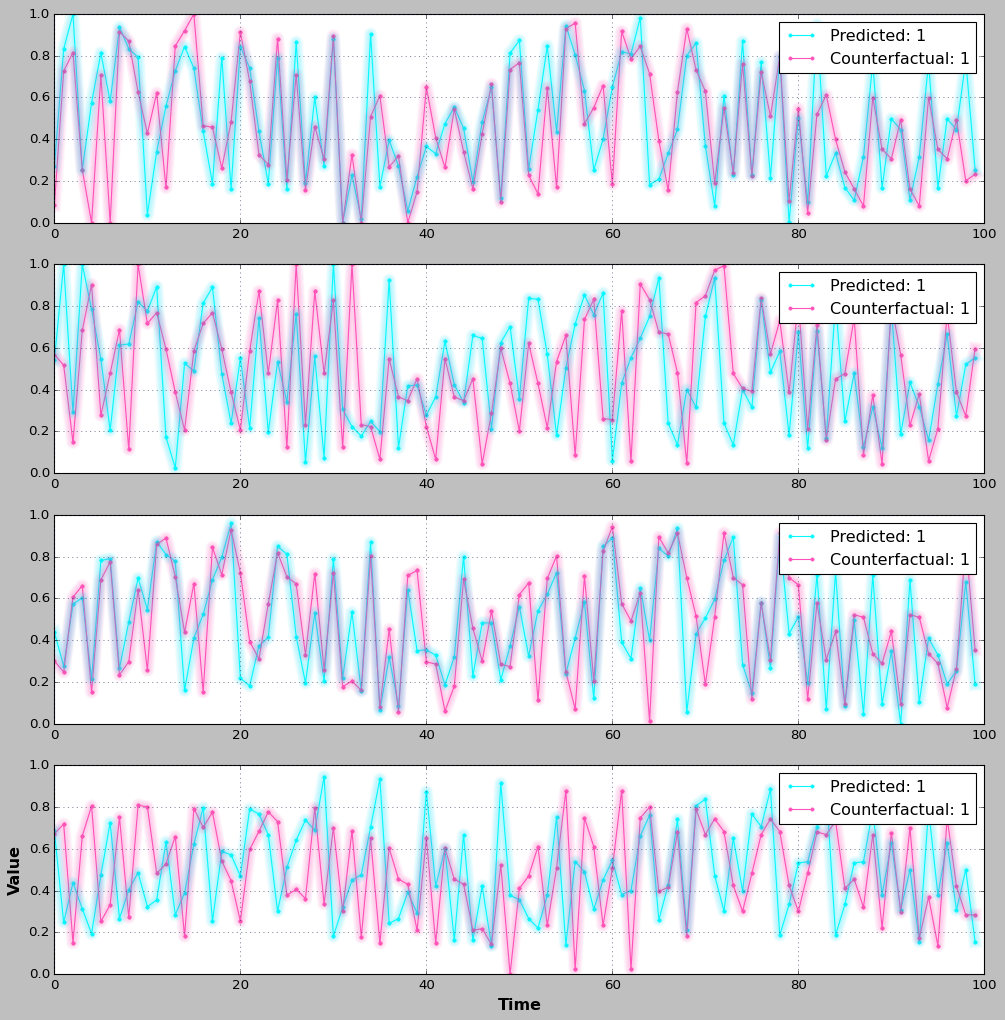

In [ ]:
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot(item,org_label,exp,cf_label,figsize=(15,15))